# TURKEY'S POSITION IN GLOBAL TERRORISM DATABASE (1970-2017)           

### AN EXPLORATORY DATA ANALYSIS (EDA) PREPARED BY ABDULKADİR GERÇEKSEVER

### 1. Introduction 

The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data based on information on more than 180,000 terrorist attacks which have occurred during this time period. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland. So we are using this material to achieve the best results on our analysis. 

### 2. The Aim of Analysis

The main aim of this explarotary data analysis is to achieve more clear vision on the terrorist activities not only at world but also in Turkey during the years 1970-2017. We will get better understanding on what's going on the terrorism side of world and Turkey when we finish to analyze the data.

### 3. General View of the Data

Variables which are used during EDA:

Year: The year in which the incident occurred.

Month: The number of the month in which the incident occurred.

Day: The numeric day of the month on which the incident occurred.

Country: The country or location where the incident occurred. 

Region: The region in which the incident occurred. The regions are divided into the 12 categories.

City: The name of the city, village, or town in which the incident occurred. 

Lat.: The latitude (based on WGS1984 standards) of the city in which the event occurred.

Long.: The longitude (based on WGS1984 standards) of the city in which the event occurred.

AttackType: The general method of attack and often reflects the broad class of tactics used. It consists of nine categories.

Killed: The number of total confirmed fatalities for the incident

Wounded: The number of confirmed non-fatal injuries to both perpetrators and victims.

Target: The specific person, building, installation, etc., that was targeted and/or victimized and is a part of the entity. 

Group: The name of the group that carried out the attack.

Target_type: The general type of target/victim. This variable consists of the following 22 categories.

Weapon_type: The type of weapon. Up to four weapon types are recorded for each incident. It consists 13 categories

Motive: When reports explicitly mention a specific motive for the attack, this motive is recorded here.

In [1]:
# importing modules which are going to use during EDA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from statsmodels.stats.weightstats import ttest_ind
import warnings

warnings.filterwarnings('ignore')

In [2]:
# the first look through the data 

Terror_World = pd.read_csv("GTD.csv", encoding = "ISO-8859-1")
Terror_World.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
# data types and numbers of variables

Terror_World.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [4]:
# we need to see 135 columns to understand what we have in the data

for i in Terror_World.columns:
    print(i)

eventid
iyear
imonth
iday
approxdate
extended
resolution
country
country_txt
region
region_txt
provstate
city
latitude
longitude
specificity
vicinity
location
summary
crit1
crit2
crit3
doubtterr
alternative
alternative_txt
multiple
success
suicide
attacktype1
attacktype1_txt
attacktype2
attacktype2_txt
attacktype3
attacktype3_txt
targtype1
targtype1_txt
targsubtype1
targsubtype1_txt
corp1
target1
natlty1
natlty1_txt
targtype2
targtype2_txt
targsubtype2
targsubtype2_txt
corp2
target2
natlty2
natlty2_txt
targtype3
targtype3_txt
targsubtype3
targsubtype3_txt
corp3
target3
natlty3
natlty3_txt
gname
gsubname
gname2
gsubname2
gname3
gsubname3
motive
guncertain1
guncertain2
guncertain3
individual
nperps
nperpcap
claimed
claimmode
claimmode_txt
claim2
claimmode2
claimmode2_txt
claim3
claimmode3
claimmode3_txt
compclaim
weaptype1
weaptype1_txt
weapsubtype1
weapsubtype1_txt
weaptype2
weaptype2_txt
weapsubtype2
weapsubtype2_txt
weaptype3
weaptype3_txt
weapsubtype3
weapsubtype3_txt
weaptype4
weapt

In [5]:
# we need to see rows and columns together to grasp the data

for i in range (0, 136, 10):
    display (Terror_World.iloc[0:3, i:i+10])

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5


,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1
0,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1
1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1
2,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1


,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt
0,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination
1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping)
2,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination


,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1
0,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman
1,NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter"
2,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee


,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt
0,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN


,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps
0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN
1,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0
2,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN


,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3
0,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid
0,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0
1,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0
2,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0


,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid
0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS


,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,0,0,0,0,NaN
1,0,1,1,1,NaN
2,-9,-9,1,1,NaN


In [6]:
# rename the columns which we need to use during our EDA

Terror_World.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country', 'region_txt':'Region',
                             'city':'City', 'latitude':'Lat.', 'longitude':'Long.', 'attacktype1_txt':'AttackType',
                             'target1':'Target', 'nkill':'Killed', 'nwound':'Wounded', 'gname':'Group',
                             'targtype1_txt':'Target_type', 'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [7]:
# new Terror data set which we are going to work on

Terror_World=Terror_World[['Year','Month','Day','Country','Region', 'City', 'Lat.','Long.', 'AttackType','Killed','Wounded',
                           'Target', 'Group','Target_type','Weapon_type','Motive']]

Terror_World

,Year,Month,Day,Country,Region,City,Lat.,Long.,AttackType,Killed,Wounded,Target,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,Unknown,Government (Diplomatic),Incendiary,NaN
5,1970,1,1,United States,North America,Cairo,37.005105,-89.176269,Armed Assault,0.0,0.0,Cairo Police Headquarters,Black Nationalists,Police,Firearms,To protest the Cairo Illinois Police Deparment
6,1970,1,2,Uruguay,South America,Montevideo,-34.891151,-56.187214,Assassination,0.0,0.0,Juan Maria de Lucah/Chief of Directorate of in...,Tupamaros (Uruguay),Police,Firearms,NaN
7,1970,1,2,United States,North America,Oakland,37.791927,-122.225906,Bombing/Explosion,0.0,0.0,Edes Substation,Unknown,Utilities,Explosives,NaN
8,1970,1,2,United States,North America,Madison,43.076592,-89.412488,Facility/Infrastructure Attack,0.0,0.0,"R.O.T.C. offices at University of Wisconsin, M...",New Year's Gang,Military,Incendiary,To protest the War in Vietnam and the draft
9,1970,1,3,United States,North America,Madison,43.072950,-89.386694,Facility/Infrastructure Attack,0.0,0.0,Selective Service Headquarters in Madison Wisc...,New Year's Gang,Government (General),Incendiary,To protest the War in Vietnam and the draft


In [8]:
# new data types and numbers of variables which we are going to work on

Terror_World.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 16 columns):
Year           181691 non-null int64
Month          181691 non-null int64
Day            181691 non-null int64
Country        181691 non-null object
Region         181691 non-null object
City           181257 non-null object
Lat.           177135 non-null float64
Long.          177134 non-null float64
AttackType     181691 non-null object
Killed         171378 non-null float64
Wounded        165380 non-null float64
Target         181055 non-null object
Group          181691 non-null object
Target_type    181691 non-null object
Weapon_type    181691 non-null object
Motive         50561 non-null object
dtypes: float64(4), int64(3), object(9)
memory usage: 22.2+ MB


### 4. Data Wrangling

In [9]:
# info of NaN in our data set as percentage

Terror_World.isnull().sum()*100/Terror_World.shape[0]

Year            0.000000
Month           0.000000
Day             0.000000
Country         0.000000
Region          0.000000
City            0.238867
Lat.            2.507554
Long.           2.508104
AttackType      0.000000
Killed          5.676120
Wounded         8.977330
Target          0.350045
Group           0.000000
Target_type     0.000000
Weapon_type     0.000000
Motive         72.171984
dtype: float64

In [10]:
Terror=Terror_World.copy()

In [11]:
# dropping the NaNs from 'City' and 'Target'

Terror=Terror.dropna(subset=['City', 'Target'])

In [12]:
# filling the NaNs with median

Terror['Killed'] = Terror['Killed'].fillna(Terror['Killed'].median())
Terror['Wounded'] = Terror['Wounded'].fillna(Terror['Killed'].median())
Terror['Casualities']=Terror['Killed']+Terror['Wounded']

In [13]:
# filling the NaNs of 'Lat.' with 39 and the NaNs of 'Long.' with 35.15

Terror['Lat.'] = Terror['Lat.'].fillna(39)
Terror['Long.'] = Terror['Long.'].fillna(35.15)

In [14]:
Terror.isnull().sum()*100/Terror.shape[0]

Year            0.000000
Month           0.000000
Day             0.000000
Country         0.000000
Region          0.000000
City            0.000000
Lat.            0.000000
Long.           0.000000
AttackType      0.000000
Killed          0.000000
Wounded         0.000000
Target          0.000000
Group           0.000000
Target_type     0.000000
Weapon_type     0.000000
Motive         72.346421
Casualities     0.000000
dtype: float64

In [15]:
Terror.describe()

,Year,Month,Day,Lat.,Long.,Killed,Wounded,Casualities
count,180624.000000,180624.000000,180624.000000,180624.000000,1.806240e+05,180624.000000,180624.000000,180624.000000
mean,2002.667519,6.471039,15.506073,23.888948,-4.491666e+02,2.268464,2.886632,5.155096
std,13.256645,3.387647,8.814463,18.500776,2.027910e+05,11.250929,34.400489,40.660693
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.905536,6.655536e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.633078,4.314357e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,35.159545,6.833439e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


### Categorical Variables
- Country
- Region
- City
- Attacktype
- Target
- Group
- Target_type
- Weapon_type
- Motive

### Continuous Variables

- Year
- Month
- Day
- Lat.
- Long.
- Killed
- Wounded
- Casualties

### 5. Data Exploration

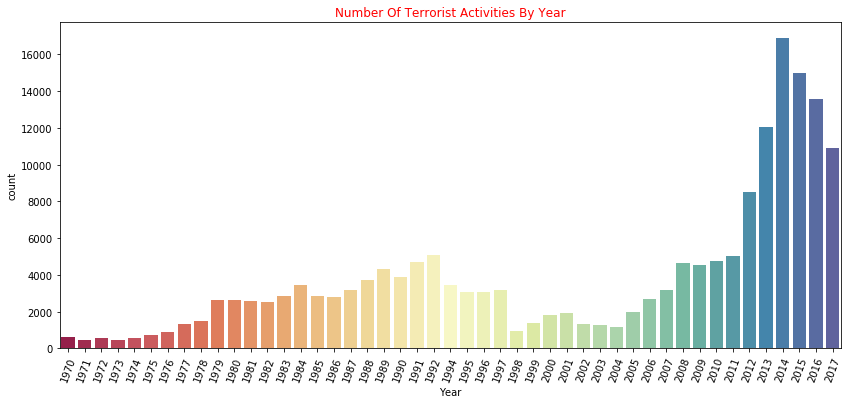

In [16]:
# Number of terrorist activities by year

plt.subplots(figsize=(14,6))
sns.countplot('Year',data=Terror,palette='Spectral')
plt.xticks(rotation=70)
plt.title('Number Of Terrorist Activities By Year', color='red')
plt.show()

In [17]:
# to see the Country and the regions with highest terrorist attacks and also the max. killed attack

print('Regions with Highest Terrorist Attacks:',Terror['Region'].value_counts().index[0])
print('Country with Highest Terrorist Attacks:',Terror['Country'].value_counts().index[0])
print('Maximum people killed in an attack are:',Terror['Killed'].max(),'that happened in',Terror.loc[Terror['Killed'].idxmax()].Country)

Regions with Highest Terrorist Attacks: Middle East & North Africa
Country with Highest Terrorist Attacks: Iraq
Maximum people killed in an attack are: 1570.0 that happened in Iraq


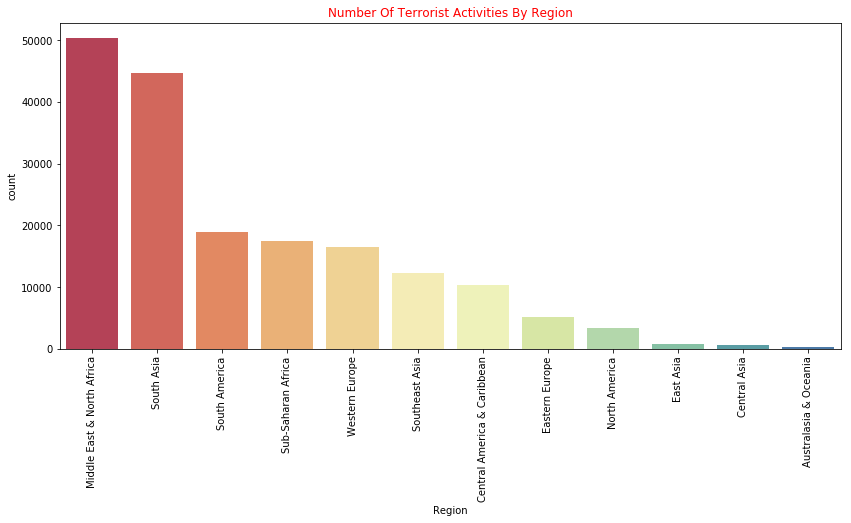

In [18]:
# Number of terrorist attacks by region on chart

plt.subplots(figsize=(14,6))
sns.countplot('Region',data=Terror,palette='Spectral',order=Terror['Region'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities By Region', color='red')
plt.show()

In [19]:
# The first 18 countries by the most killed ones in terrorist attacks

KilledByTerror=Terror.groupby('Country').sum().sort_values('Killed', ascending=False).iloc[:18].Killed

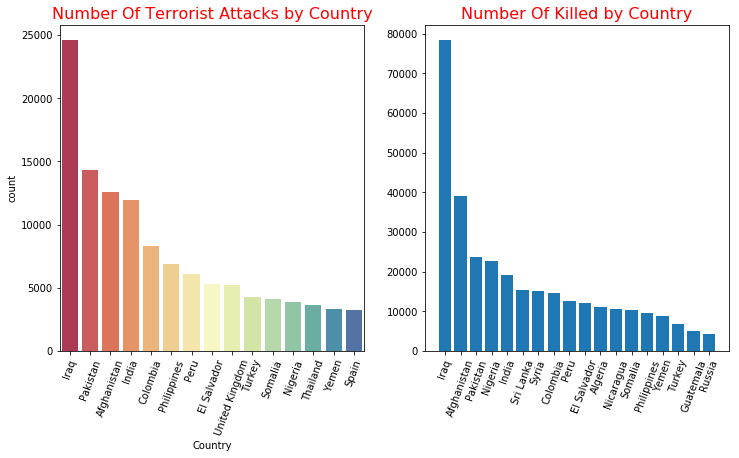

In [20]:
# Number of terrorist attacks and number of killed by country on charts

plt.subplots(figsize=(12,6))
plt.subplot(1,2,1)
sns.countplot('Country',data=Terror,palette='Spectral', 
              order=Terror.Country.value_counts().iloc[:15].index)
plt.xticks(rotation=70)
plt.title('Number Of Terrorist Attacks by Country', fontsize=16, color='red')

plt.subplot(1,2,2)
plt.bar(KilledByTerror.index, KilledByTerror)
plt.xticks(rotation=70)
plt.title('Number Of Killed by Country', fontsize=16, color='red')

plt.show()

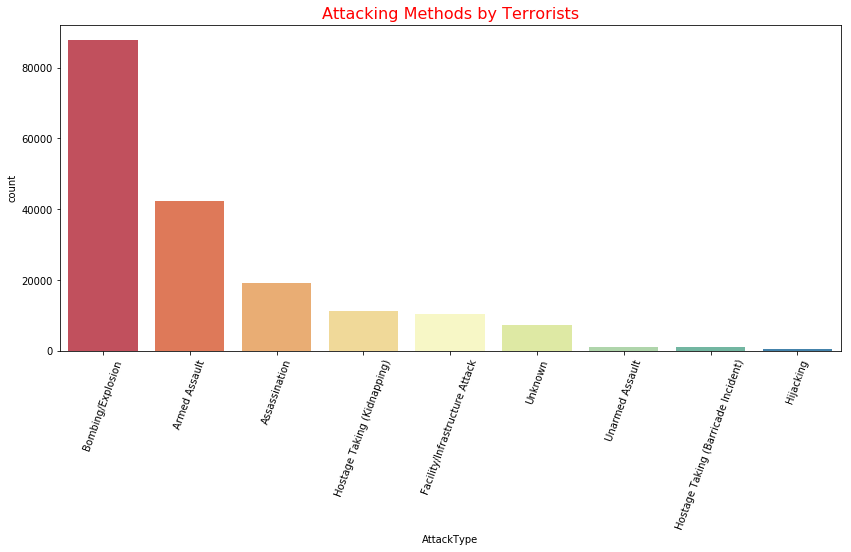

In [21]:
# Attacking methods by terrorists

plt.subplots(figsize=(14,6))
sns.countplot('AttackType', data=Terror,palette='Spectral',order=Terror['AttackType'].value_counts().index)
plt.xticks(rotation=70)
plt.title('Attacking Methods by Terrorists', fontsize=16, color='red')
plt.show()

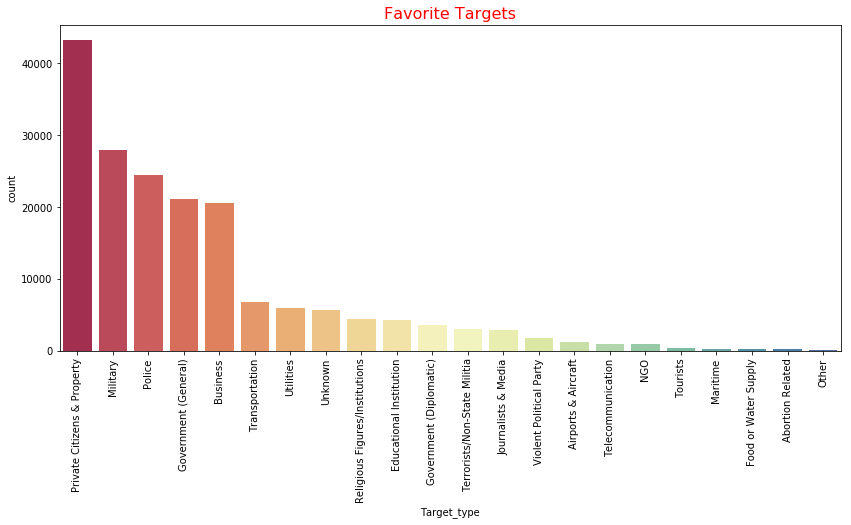

In [22]:
# Favorite targets of attacks

plt.subplots(figsize=(14,6))
sns.countplot(Terror['Target_type'],palette='Spectral',order=Terror['Target_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Favorite Targets', fontsize=16, color='red')
plt.show()

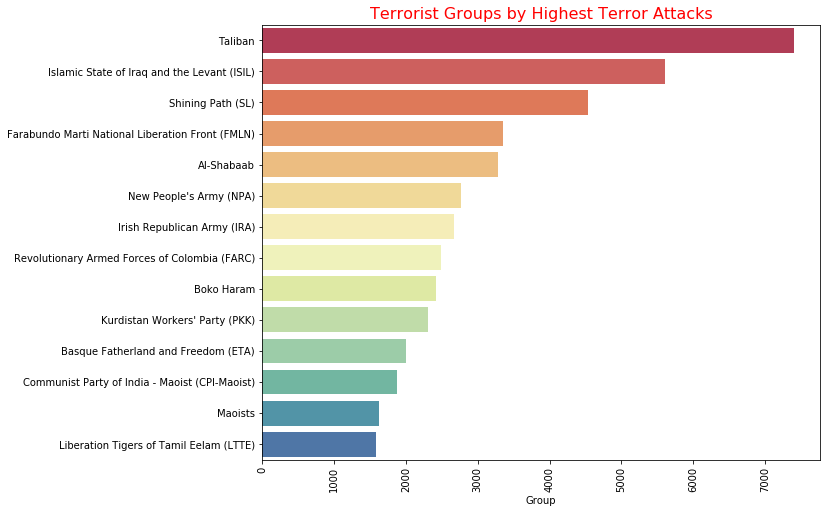

In [23]:
# Terrorist groups by highest terror attacks

sns.barplot(Terror['Group'].value_counts()[1:15],Terror['Group'].value_counts()[1:15].index,palette=('Spectral'))
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Terrorist Groups by Highest Terror Attacks', fontsize=16, color='red')
plt.show()

In [24]:
TR_Terror=Terror[Terror['Country']=='Turkey']
TR_Terror

,Year,Month,Day,Country,Region,City,Lat.,Long.,AttackType,Killed,Wounded,Target,Group,Target_type,Weapon_type,Motive,Casualities
226,1970,4,25,Turkey,Middle East & North Africa,Istanbul,41.106178,28.689863,Bombing/Explosion,0.0,0.0,EL AL Office,Palestinians,Airports & Aircraft,Explosives,NaN,0.0
486,1970,8,31,Turkey,Middle East & North Africa,Ankara,39.930771,32.767540,Bombing/Explosion,0.0,0.0,"TUSLOG Detachment 30, USAF",Turkish People's Liberation Army,Military,Explosives,NaN,0.0
531,1970,10,2,Turkey,Middle East & North Africa,Izmir,38.395649,27.135641,Bombing/Explosion,0.0,0.0,U.S. Air Force Commissary,Turkish People's Liberation Front (TPLF)(THKP-C),Military,Explosives,NaN,0.0
534,1970,10,3,Turkey,Middle East & North Africa,Ankara,39.930771,32.767540,Bombing/Explosion,0.0,0.0,USIS Office,Unknown,Government (Diplomatic),Explosives,NaN,0.0
535,1970,10,3,Turkey,Middle East & North Africa,Ankara,39.930771,32.767540,Bombing/Explosion,0.0,0.0,"building, U.S. Element Cento",Turkish People's Liberation Army,Business,Explosives,NaN,0.0
539,1970,10,6,Turkey,Middle East & North Africa,Ankara,39.930771,32.767540,Armed Assault,0.0,0.0,"vehicle, USAF member",Turkish People's Liberation Army,Military,Incendiary,NaN,0.0
575,1970,10,27,Turkey,Middle East & North Africa,Ankara,39.930771,32.767540,Bombing/Explosion,0.0,0.0,U.S. Military Annex Exchange,Turkish People's Liberation Army,Military,Explosives,NaN,0.0
597,1970,11,10,Turkey,Middle East & North Africa,Ankara,39.930771,32.767540,Facility/Infrastructure Attack,0.0,0.0,Pan Am Office,Unknown,Airports & Aircraft,Incendiary,NaN,0.0
610,1970,11,21,Turkey,Middle East & North Africa,Ankara,39.930771,32.767540,Bombing/Explosion,0.0,0.0,U.S. Embassy,Turkish People's Liberation Army,Government (Diplomatic),Explosives,NaN,0.0
617,1970,11,23,Turkey,Middle East & North Africa,Ankara,39.930771,32.767540,Bombing/Explosion,0.0,0.0,Portuguese Embassy,Unknown,Government (Diplomatic),Explosives,NaN,0.0


In [25]:
TR_Terror.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4283 entries, 226 to 181611
Data columns (total 17 columns):
Year           4283 non-null int64
Month          4283 non-null int64
Day            4283 non-null int64
Country        4283 non-null object
Region         4283 non-null object
City           4283 non-null object
Lat.           4283 non-null float64
Long.          4283 non-null float64
AttackType     4283 non-null object
Killed         4283 non-null float64
Wounded        4283 non-null float64
Target         4283 non-null object
Group          4283 non-null object
Target_type    4283 non-null object
Weapon_type    4283 non-null object
Motive         616 non-null object
Casualities    4283 non-null float64
dtypes: float64(5), int64(3), object(9)
memory usage: 602.3+ KB


In [26]:
TR_Terror.isnull().sum()*100/TR_Terror.shape[0]

Year            0.000000
Month           0.000000
Day             0.000000
Country         0.000000
Region          0.000000
City            0.000000
Lat.            0.000000
Long.           0.000000
AttackType      0.000000
Killed          0.000000
Wounded         0.000000
Target          0.000000
Group           0.000000
Target_type     0.000000
Weapon_type     0.000000
Motive         85.617558
Casualities     0.000000
dtype: float64

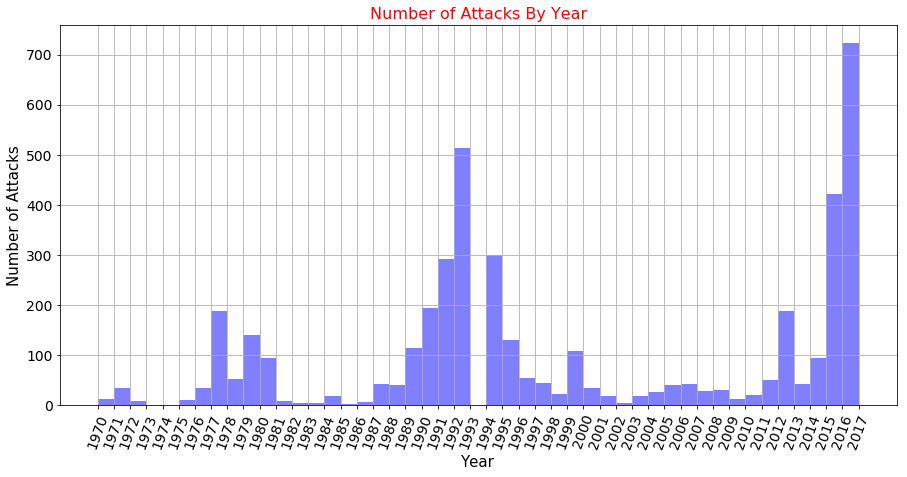

In [27]:
# Number of attacks by year

TR_Terror.Year.plot(kind = 'hist', color = 'b', bins=range(1970, 2018), figsize = (15,7), alpha=0.5, grid=True)
plt.xticks(range(1970, 2018), rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Number of Attacks", fontsize=15)
plt.xticks(rotation=70)
plt.title("Number of Attacks By Year", fontsize=16, color = 'r')
plt.show()

In [28]:
TR_Terror["part_long"] = np.where((TR_Terror['Long.']>35.15),'Doğu', 'Batı')
TR_Terror["part_lat"] = np.where((TR_Terror['Lat.']>39),'Kuzey', 'Güney')
TR_Terror["part"] = TR_Terror["part_lat"] + TR_Terror["part_long"]

In [29]:
# Most targeted part of Turkey

Parts= ["NorthEast", "NorthWest", "SouthEast", "SouthWest"]


TR_Terror[TR_Terror['Long.'] > 35.15]


NorthEast=TR_Terror[TR_Terror['Long.'] > 35.15] or TR_Terror[TR_Terror['Lat.'] > 39]
NorthWest=TR_Terror[TR_Terror['Long.'] < 35.15] or TR_Terror[TR_Terror['Lat.'] > 39]
SouthEast=TR_Terror[TR_Terror['Long.'] > 35.15] or TR_Terror[TR_Terror['Lat.'] < 39]
SouthWest=TR_Terror[TR_Terror['Long.'] < 35.15] or TR_Terror[TR_Terror['Lat.'] < 39]

TR_East=TR_Terror[TR_Terror['Long.'] > 35.15]
TR_SouthEast=TR_East[TR_East['Lat.'] < 39]

TR_Terror.City.value_counts().drop('Unknown').head(10).plot.bar(figsize=[12,6], grid=True, alpha=0.8)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.xlabel("Cities", fontsize=15)
plt.ylabel("Number of Attacks", fontsize=15)
plt.xticks(rotation=70)
plt.title("Most Targeted Cities", fontsize=16, color = 'r')
plt.show()

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

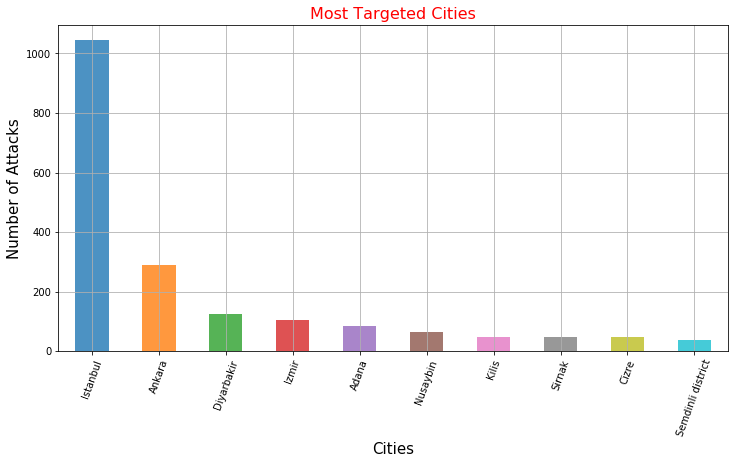

In [30]:
# Most targeted cities

TR_Terror.City.value_counts().drop('Unknown').head(10).plot.bar(figsize=[12,6], grid=True, alpha=0.8)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.xlabel("Cities", fontsize=15)
plt.ylabel("Number of Attacks", fontsize=15)
plt.xticks(rotation=70)
plt.title("Most Targeted Cities", fontsize=16, color = 'r')
plt.show()

In [31]:
!pip install wordcloud

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


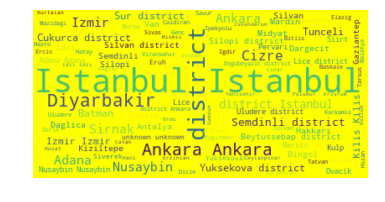

In [32]:
from wordcloud import WordCloud
df = TR_Terror[TR_Terror.City != 'Unknown']
wordcloud = WordCloud(max_font_size=80, max_words=100, background_color="yellow").generate(" ".join(df.City))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig("graph.png")
plt.show()

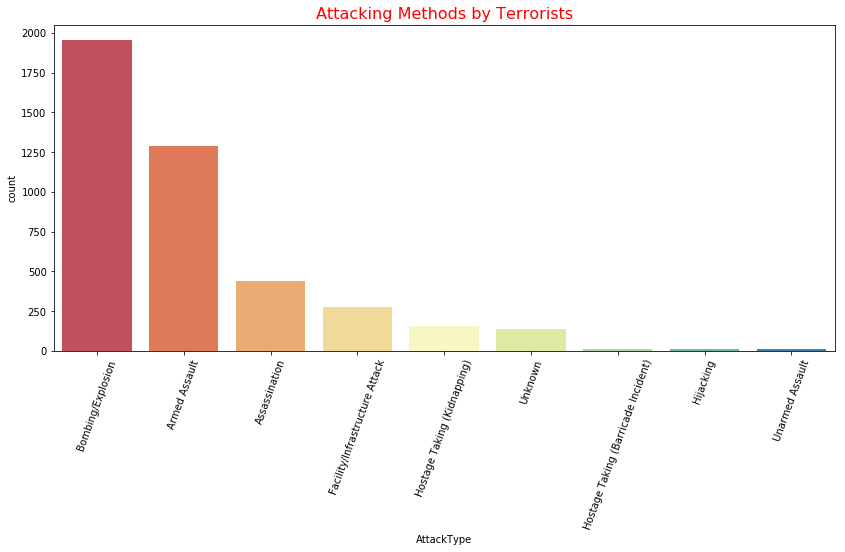

In [33]:
# Attacking methods by terrorists in Turkey

plt.subplots(figsize=(14,6))
sns.countplot('AttackType', data=TR_Terror,palette='Spectral',order=TR_Terror['AttackType'].value_counts().index)
plt.xticks(rotation=70)
plt.title('Attacking Methods by Terrorists', fontsize=16, color='red')
plt.show()

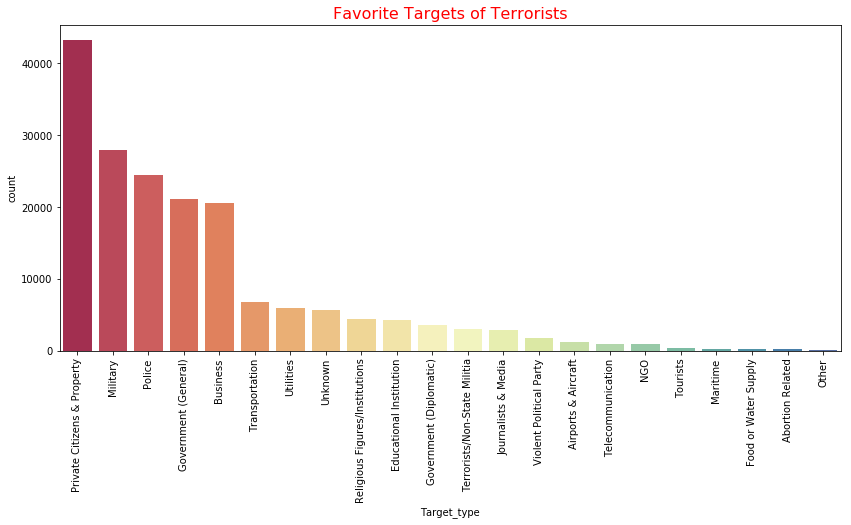

In [34]:
# Favorite targets of terrorists in Turkey

plt.subplots(figsize=(14,6))
sns.countplot(Terror['Target_type'],palette='Spectral',order=Terror['Target_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Favorite Targets of Terrorists', fontsize=16, color='red')
plt.show()

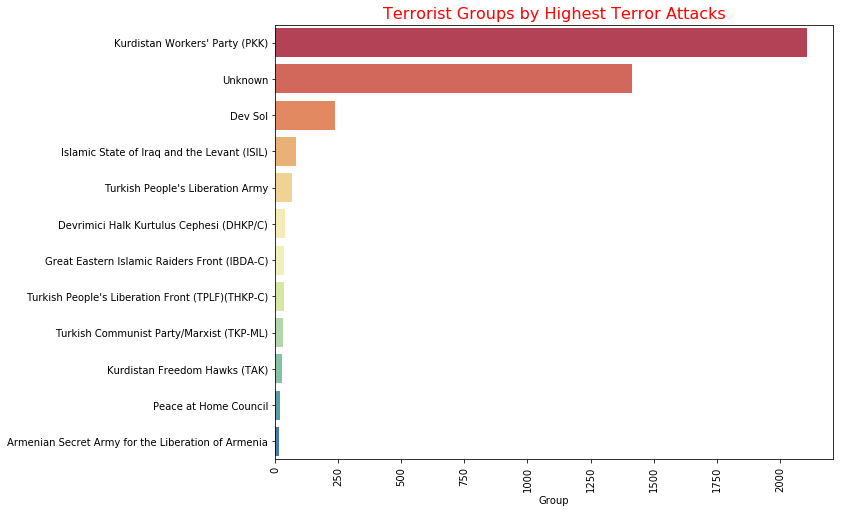

In [35]:
sns.barplot(TR_Terror['Group'].value_counts()[0:12],TR_Terror['Group'].value_counts()[0:12].index,palette=('Spectral'))
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Terrorist Groups by Highest Terror Attacks', fontsize=16, color='red')
plt.show()

In [36]:
TR_Terror.corr()

,Year,Month,Day,Lat.,Long.,Killed,Wounded,Casualities
Year,1.000000,0.134629,-0.034955,-0.352389,0.452760,-0.000065,0.103199,0.084678
Month,0.134629,1.000000,-0.067414,-0.101717,0.186811,0.025903,0.045982,0.046085
Day,-0.034955,-0.067414,1.000000,0.017415,-0.052473,-0.047940,-0.008049,-0.022053
Lat.,-0.352389,-0.101717,0.017415,1.000000,-0.715312,-0.087063,0.000424,-0.027706
Long.,0.452760,0.186811,-0.052473,-0.715312,1.000000,0.120803,-0.012239,0.028881
Killed,-0.000065,0.025903,-0.047940,-0.087063,0.120803,1.000000,0.420811,0.667596
Wounded,0.103199,0.045982,-0.008049,0.000424,-0.012239,0.420811,1.000000,0.956325
Casualities,0.084678,0.046085,-0.022053,-0.027706,0.028881,0.667596,0.956325,1.000000


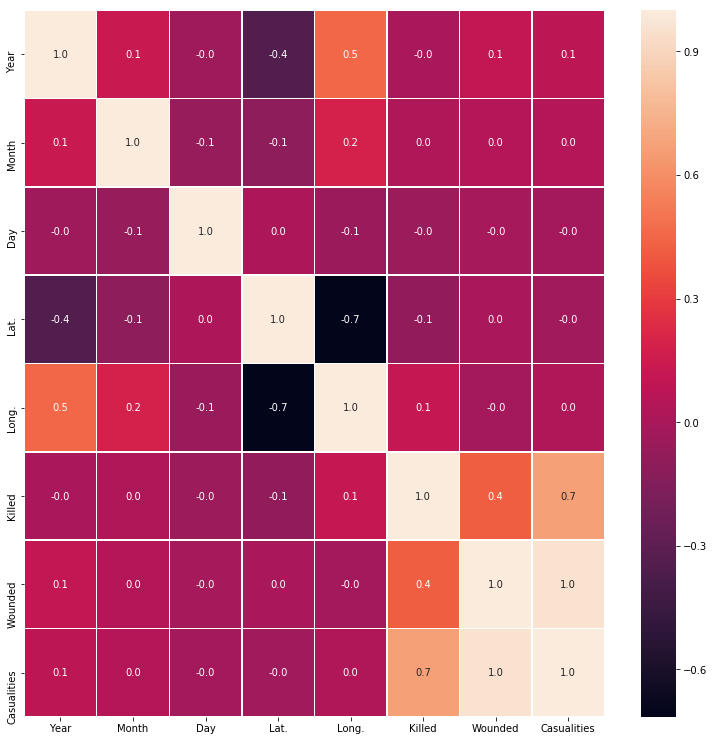

In [37]:
f,ax = plt.subplots(figsize=(13, 13))
sns.heatmap(TR_Terror.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [38]:
PKK=TR_Terror[TR_Terror['Group']=="Kurdistan Workers' Party (PKK)"]
PKK

,Year,Month,Day,Country,Region,City,Lat.,Long.,AttackType,Killed,Wounded,Target,Group,Target_type,Weapon_type,Motive,Casualities,part_long,part_lat,part
22932,1984,8,15,Turkey,Middle East & North Africa,Eruh,37.749626,42.179906,Bombing/Explosion,1.0,9.0,Post,Kurdistan Workers' Party (PKK),Military,Explosives,NaN,10.0,Doğu,Güney,GüneyDoğu
22933,1984,8,15,Turkey,Middle East & North Africa,Unknown,37.537669,43.686638,Unknown,0.0,3.0,Post,Kurdistan Workers' Party (PKK),Military,Unknown,NaN,3.0,Doğu,Güney,GüneyDoğu
23460,1984,10,9,Turkey,Middle East & North Africa,Cukurca,37.253172,43.612234,Unknown,8.0,2.0,Turkish Military Vehicle,Kurdistan Workers' Party (PKK),Military,Unknown,NaN,10.0,Doğu,Güney,GüneyDoğu
29387,1986,10,21,Turkey,Middle East & North Africa,Mardin,37.322736,40.724568,Bombing/Explosion,1.0,1.0,NATO radar station,Kurdistan Workers' Party (PKK),Military,Firearms,NaN,2.0,Doğu,Güney,GüneyDoğu
31426,1987,6,30,Turkey,Middle East & North Africa,Gungoren,37.170607,40.393750,Facility/Infrastructure Attack,0.0,0.0,Construction Site,Kurdistan Workers' Party (PKK),Business,Firearms,NaN,0.0,Doğu,Güney,GüneyDoğu
31495,1987,7,8,Turkey,Middle East & North Africa,Pecenek,40.016742,33.005748,Bombing/Explosion,16.0,0.0,Village of Pecenek,Kurdistan Workers' Party (PKK),Private Citizens & Property,Firearms,NaN,16.0,Batı,Kuzey,KuzeyBatı
31496,1987,7,8,Turkey,Middle East & North Africa,Yuvali,36.686832,36.453230,Bombing/Explosion,9.0,0.0,Village of Yuvali,Kurdistan Workers' Party (PKK),Private Citizens & Property,Firearms,NaN,9.0,Doğu,Güney,GüneyDoğu
31504,1987,7,9,Turkey,Middle East & North Africa,Findik,37.512355,41.971206,Unknown,1.0,3.0,Military Unit,Kurdistan Workers' Party (PKK),Military,Unknown,NaN,4.0,Doğu,Güney,GüneyDoğu
31891,1987,8,18,Turkey,Middle East & North Africa,Milan,37.752625,41.887635,Armed Assault,25.0,0.0,Town of Milan,Kurdistan Workers' Party (PKK),Private Citizens & Property,Firearms,NaN,25.0,Doğu,Güney,GüneyDoğu
31917,1987,8,20,Turkey,Middle East & North Africa,Dargecit,37.547711,41.718277,Armed Assault,5.0,0.0,Town of Dargecit,Kurdistan Workers' Party (PKK),Private Citizens & Property,Firearms,NaN,5.0,Doğu,Güney,GüneyDoğu


In [ ]:
stats.ttest_ind()

### Conclusions

At the end of this analysis we conclude that;
- When we look at number of terrorist activities through the World; we see that especially after 9/11, three years seems to be stable but from 2005 to 2014 there is really a steady increase, even though there seems to be a decrease until 2017, the activities after 2005 until today are really high level than before 2005 till 1970.
- Number of terrorist activities in Middle East & North Africa is at the highest point, after then comes South Asia. In the Middle East, Iraq is the first country with its terrorist activities and killed people. After Iraq comes Pakistan and Afghanistan. The terrorists use bombings/explosions as method during their attacks. And the favorite target of the attacks is private citizens/properties and then respectively; military, police, government and business parts of the countries. 
- Most of the terror attacks were held by Taliban, then ISIL.
- When we look at number of terrorist activities through Turkey; especially after 1987 until 1999 there seems to be an increase. This is because of the Kurdistan Worker’s Party (PKK)’s occurence. On the other hand there is again an increase on the activities after 2014 till today. We can say that the activities in Turkey is not related with 9/11. There is some another characteristic specialities and related terrorism events of the country because of its geographical position between Europe and Asia.
- Number of terrorist activities in İstanbul is at the highest point, after then comes ankara and Diyarbakır. The terrorists use bombings/explosions and then armed assault as a method during their attacks. And the favorite target of the attacks is private citizens/properties and then respectively; military, police, government and business parts of the cities like the scene at World. 
- Most of the terror attacks were held by Kurdistan Worker’s Party (PKK). 


